In [1]:
 ##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Standardize each column of dataset

In [3]:
data_copy = df[df.columns]
mean_x, std_x = data_copy.mean(), data_copy.std()
print(mean_x, std_x)
df[df.columns] = (data_copy - mean_x) / std_x
###save a copy of the standardized for later
stand_df = df
df

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64 TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64


,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


### Add extra columns

In [4]:
df.insert(0, "Bias", 1)
df

,Bias,TV,Radio,Newspaper,Sales
1,1,0.967425,0.979066,1.774493,1.548168
2,1,-1.194379,1.080097,0.667903,-0.694304
3,1,-1.512360,1.524637,1.779084,-0.905135
4,1,0.051919,1.214806,1.283185,0.858177
5,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287,-1.230964
197,1,-0.615491,-1.236899,-1.031011,-0.828469
198,1,0.348934,-0.940539,-1.109069,-0.234310
199,1,1.590574,1.261955,1.636743,2.199827


### Divide the data into training and testing set

In [5]:
x = df[df.columns[:-1]]
y = df["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state = 42)

In [6]:
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)
x_test size: (30, 4)
y_test size: (30,)


### Fit the model

#### Initialize weights

In [7]:
def initialize_weights():
    np.random.seed(42)
    return np.random.uniform(0,1,4)

#### Predict function

In [8]:
def predict(x, weights): 
    return np.dot(x, weights)

#### Compute Cost function

In [9]:
#y_hat -> vector; the predicted y value
#y -> vector; the actual y value
def comp_cost(y_hat, y):
    summation = np.sum(np.square(y_hat-y))
    cost = summation/(2*y.shape[0])
    return cost

#### Compute Gradient function

In [10]:
#y_hat -> vector; the predicted y value
#y -> vector; the actual y value
def comp_grad(x, y_hat, y, a):
    grad_res = a * np.dot(x.T,y_hat-y) / y.shape[0]
    return grad_res

#### Update Weights function

In [11]:
def update_weights(weights, grad):
    return weights-grad

#### Gradient Descent function

In [12]:
def grad_descent(x, y, iteration, weights, a=0.01):
    cost_list = []
    weights_list = []
    for i in range(iteration):
        y_hat = predict(x, weights)
        costs = comp_cost(y_hat,y)
        cost_list.append(costs)
        grad = comp_grad(x, y_hat, y, a)
        weights = update_weights(weights,grad)
        weights_list.append(weights)
        
    return cost_list, weights_list

#### Plot Cost function

In [13]:
def plot_func(cost):
    plt.title("Cost of function")
    plt.xlabel("No. of iterations")
    plt.ylabel("Cost")
    plt.plot(cost)
    plt.show()

### Predict y for train set and calculate the cost

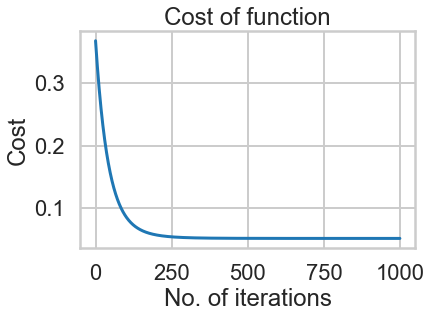

0.051079837450750655


In [14]:
train_weights = initialize_weights()
train_costs, act_weights = grad_descent(x_train, y_train, 1000, train_weights)
plot_func(train_costs)
train_pred_y = predict(x_train, act_weights[-1])
cost = comp_cost(train_pred_y, y_train)
print(cost)

### Predict y for test set and calculate the cost

In [15]:
###using the calculated weights
test_pred_y = predict(x_test, act_weights[-1])
cost = comp_cost(test_pred_y, y_test)
cost

0.05244485003952755

### Revert Standardized data into original form

In [16]:
data_copy = df[df.columns[1:]]
df[df.columns[1:]] = (data_copy * std_x) + mean_x

df

,Bias,TV,Radio,Newspaper,Sales
1,1,230.1,37.8,69.2,22.1
2,1,44.5,39.3,45.1,10.4
3,1,17.2,45.9,69.3,9.3
4,1,151.5,41.3,58.5,18.5
5,1,180.8,10.8,58.4,12.9
...,...,...,...,...,...
196,1,38.2,3.7,13.8,7.6
197,1,94.2,4.9,8.1,9.7
198,1,177.0,9.3,6.4,12.8
199,1,283.6,42.0,66.2,25.5


### Divide into x and y

In [17]:
x_orig = df[df.columns[:-1]]
y_orig = df["Sales"]

### Original form cost results and analyse 

In [18]:
### using the calculated weights, get the prediction using the original x
pred_y = predict(x_orig, act_weights[-1])
cost = comp_cost(pred_y, y_orig)
cost


7509.588363617978

# Questions

1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:
        ℎ𝜃(𝑥) = 𝜃0 + 𝜃1𝑇𝑉 + 𝜃2𝑅𝑎𝑑𝑖𝑜 + 𝜃3𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟
   What are your interpretations regarding the formed linear model?

#### Answer:
   We fit our model with initial weights of 0 and train it using gradient descent to get the theta values, whice are:

In [19]:
init_w = np.array([0.0, 0.0, 0.0, 0.0])
train_costs, act_weights = grad_descent(x_train, y_train, 5000, init_w)
act_weights[-1]

array([4.35589486e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03])

From the given array, we have 𝜃0 = 4.35589486e-04, 𝜃1 = 7.37383146e-01, 𝜃2=5.36307180e-01, 𝜃3=3.14254020e-03. 

Therefore, the linear model is:

ℎ𝜃(𝑥) = 4.35589486e-04 + 7.37383146e-01 * 𝑇𝑉 + 5.36307180e-01 * 𝑅𝑎𝑑𝑖𝑜 + 3.14254020e-03 * 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

From the linear model, we can say that TV is the greatest predictor followed by Radio then Newspaper then the bias.

2. Provide a scatter plot of the y_hat(i) and y(i) for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

r2 score using train set: 0.8936793584593189


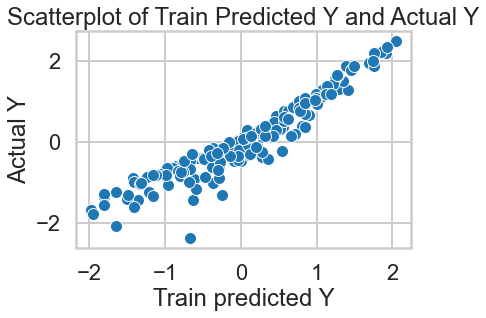

In [20]:
new_train_pred_y = predict(x_train, act_weights[-1])
### Visualize the relationship using scatterplot
plt.title("Scatterplot of Train Predicted Y and Actual Y")
plt.xlabel("Train predicted Y")
plt.ylabel("Actual Y")
sns.scatterplot(x=new_train_pred_y, y=y_train)
train_r2 = r2_score(y_train, new_train_pred_y)
print("r2 score using train set:", train_r2)

r2 score using test set:  0.911027570209169


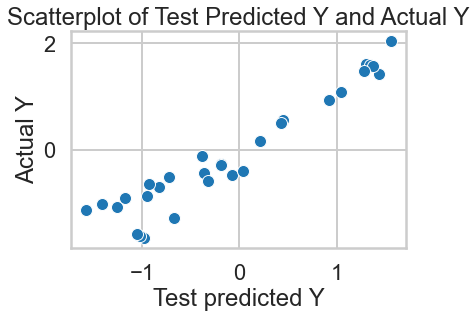

In [21]:
new_test_pred_y = predict(x_test, act_weights[-1])

###Scatter plot test set
plt.title("Scatterplot of Test Predicted Y and Actual Y")
plt.xlabel("Test predicted Y")
plt.ylabel("Actual Y")
sns.scatterplot(x=new_test_pred_y, y=y_test)
test_r2 = r2_score(y_test, new_test_pred_y)
print("r2 score using test set: ", test_r2)

3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

#### Answer:
The following line plot of the cost for 5000 iteration is seen below:

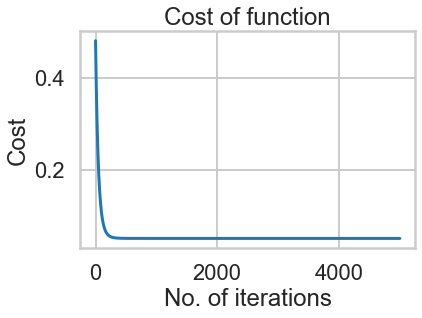

In [22]:
plot_func(train_costs)

Let us get the error, r2, and cost for iterations 500, 1000, and 5000

For 500 iterations, the cost, error, and r2 is:

In [23]:
pred_y_5h = predict(x, act_weights[499])
r2_5h_score = r2_score(y, pred_y_5h)
MAE_5h = mean_absolute_error(y, pred_y_5h)
print("Cost: ", train_costs[499])
print("R2:", r2_5h_score)
print("MAE:", MAE_5h)

Cost:  0.051185390643040306
R2: 0.896415695070808
MAE: 0.2413453935318983


For 1000 iterations, the cost, error, and r2 is:

In [24]:
pred_y_1k = predict(x, act_weights[999])
r2_1k_score = r2_score(y, pred_y_1k)
MAE_1k = mean_absolute_error(y, pred_y_1k)
print("Cost: ", train_costs[999])
print("R2:", r2_1k_score)
print("MAE:", MAE_1k)

Cost:  0.051079831065374885
R2: 0.8969142691949463
MAE: 0.2399596550148806


For 5000 iterations, the cost, error, and r2 is:

In [25]:
pred_y_5k = predict(x, act_weights[-1])
r2_5k_score = r2_score(y, pred_y_5k)
MAE_5k = mean_absolute_error(y, pred_y_5k)
print("Cost: ", train_costs[-1])
print("R2:", r2_5k_score)
print("MAE:", MAE_5k)

Cost:  0.051079554729786925
R2: 0.8969225203073511
MAE: 0.23988863657724685


From the plot and the results of the cost, error, and r2 score of each iteration, we see that as the number of iteration increases the cost and mean absolute error is decreasing while r2 score is increasing. However, the decrease and increase of the different scores are in the decimal range which means that the changes are somewhat miniscule based on how much more iterations were done.

4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

In [26]:
print("We'll use 0.051 as the optimal cost since it where the cost is almost flat")
rounded_cost = np.round(train_costs, 3)
opt_i = np.where(rounded_cost == 0.051)
print("With this, the optimal iteration is", opt_i[0][0], "th iteration")

We'll use 0.051 as the optimal cost since it where the cost is almost flat
With this, the optimal iteration is 395 th iteration


Using the optimal Iteration and setting the learning rate to 0.1, we have

In [27]:
alphas = [0.1, 0.01, 0.001, 0.0001, 0.2]
cost_list = []
for i in alphas:
    print("Alpha rate: ", i)
    train_costs, n_act_weights = grad_descent(x_train, y_train, opt_i[0][0], init_w,a=i)
    cost_list.append(train_costs)
    train_pred_y = predict(x_train, n_act_weights[-1])
    cost = comp_cost(train_pred_y, y_train)
    pred_y = predict(x, n_act_weights[-1])
    r_squared = r2_score(y, pred_y)
    MAE = mean_absolute_error(y, pred_y)
    print("Cost: ", train_costs[-1])
    print("R2:", r_squared)
    print("MAE:", MAE)

Alpha rate:  0.1
Cost:  0.051079554729786925
R2: 0.8969225203072294
MAE: 0.2398886365786446
Alpha rate:  0.01
Cost:  0.051500250039664096
R2: 0.8953717254069102
MAE: 0.24272053055351145
Alpha rate:  0.001
Cost:  0.23622673852442644
R2: 0.5060374784393623
MAE: 0.563782776791368
Alpha rate:  0.0001
Cost:  0.44536428998765176
R2: 0.07286799176886316
MAE: 0.7890090157139464
Alpha rate:  0.2
Cost:  0.051079554729786925
R2: 0.8969225203073514
MAE: 0.239888636577241


<AxesSubplot:title={'center':'Cost of different learning rates'}, xlabel='No. of iterations', ylabel='Cost'>

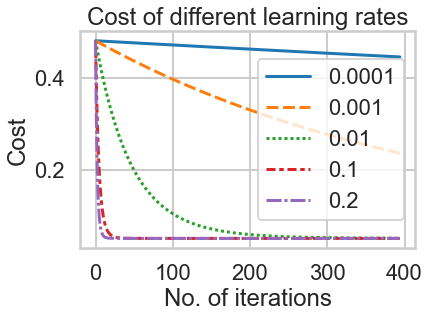

In [28]:
cost_df = pd.DataFrame(cost_list).T
cost_df.columns= alphas
plt.title("Cost of different learning rates")
plt.ylabel("Cost")
plt.xlabel("No. of iterations")
sns.lineplot(data=cost_df)

From the graph, it can be seen that 0.0001 takes on a linear form while the rest has a curved line form. It can be seen that 0.2 reaches the lowest cost the quickest while 0.0001 doesn't reach the lowest cost at the optimal number of iterations.

5. Is there a relationship on the learning rate and the number of iterations?

As was seen in the last graph, as the learning rate increases the number of iteration decreases to reach the optimal cost which means that their relationship is inversely proportional.

6. Compare the results with the results of ordinary least squares function

Build the linear regression model

In [29]:
linreg = LinearRegression().fit(x_train, y_train)
pred_y_lin = linreg.predict(x_test)

In [30]:
pred_y_lin

array([ 0.44441111,  1.30168679,  1.43691235, -0.66730857,  1.55533551,
       -0.19033088,  1.34451196, -1.25613029, -0.07239572,  0.21395403,
       -0.9477649 , -1.4143734 ,  0.04187445, -0.9794427 , -0.82941714,
       -0.35860114, -1.02352749,  0.43360346, -0.72253191,  0.92669059,
        1.04134773, -0.18638735, -0.32341141,  1.3765889 , -1.1785509 ,
       -1.57241482,  1.28461088, -0.38557956, -0.92832092, -1.05226106])

The created linear regression model has an r2 score of: 

In [31]:
print(linreg.score(x_test, y_test))

0.9110275702091714


In [32]:
print("Using the optimal iteration's weights of our gradient descent to predict the results, we have")
opt_pred_y = predict(x_test, act_weights[394])
opt_pred_y

Using the optimal iteration's weights of our gradient descent to predict the results, we have


array([ 0.45632242,  1.28440583,  1.42255522, -0.6482762 ,  1.47624351,
       -0.16993274,  1.30064552, -1.2352999 , -0.07222912,  0.21357984,
       -0.96178875, -1.37293563,  0.1208764 , -0.98922631, -0.79911416,
       -0.33197871, -0.9948767 ,  0.40902538, -0.70284619,  0.88597173,
        1.06582203, -0.09822649, -0.35109566,  1.3892682 , -1.1769486 ,
       -1.53434624,  1.2500434 , -0.39232188, -0.90517284, -1.0666816 ])

Which has an r2 score of:

In [33]:
r_squared = r2_score(y_test, opt_pred_y)

In [34]:
print(r_squared)

0.906288920753653
